# Assignment 3: Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Contributors:
### Lukas Andersson - 14 Hours
### Ramapriya Navalpakkam - 13 Hours

## 1.

### a.
The Scatterplot for the data is as show below :

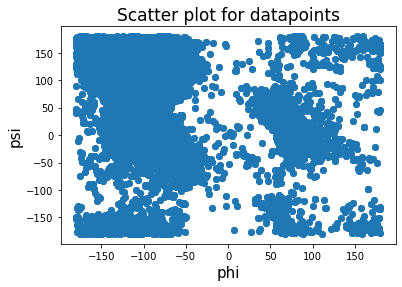

In [2]:
x = []
y = []

df = pd.read_csv('../data/data_all.csv')

for index, row in df.iterrows():
    x.append(row['phi'])
    y.append(row['psi'])
    
dataFrame = pd.DataFrame({
    'phi' : x,
    'psi' : y
});
plt.plot(dataFrame['phi'], dataFrame['psi'], 'o')
plt.title(label='Scatter plot for datapoints', fontsize=17)
plt.xlabel(xlabel='phi',fontsize=15)
plt.ylabel(ylabel='psi',fontsize=15)
plt.scatter(x, y);

### b.

A heatmap for the data is presented below :

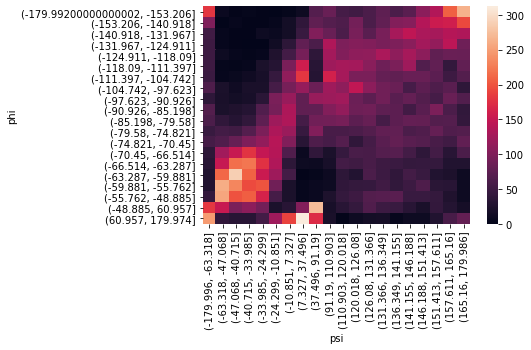

In [3]:
bins = np.linspace(0, 1, 10)

bin_x= pd.qcut(x, q=20)
bin_y= pd.qcut(y, q=20)
heatmap_data = pd.DataFrame({
    'phi' : bin_x,
    'psi'  : bin_y
})
ax = sns.heatmap(pd.crosstab(heatmap_data['phi'], heatmap_data['psi']), fmt='d')

## 2.

### a.

We evaluate the kmeans for different values of k using the Elbow method. In the below elbow curve plot, the x-axis determines the k values we chose and the y axis shows the sum of squared distances between the clusters. The distance between clusters reduce steeply until k=3 and decrease linearly on k values greater than 3. Therefore, the optimal number of clusters for given data is 3.

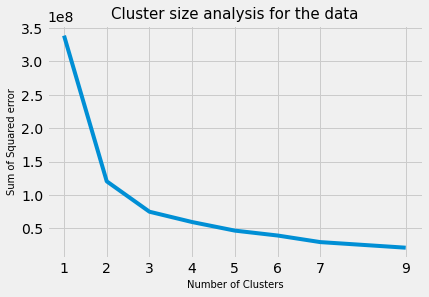

In [4]:
k = [1,2,3,4,5,6,7,9]

sse = []
for i in k :
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dataFrame)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(k, sse)
plt.xticks(k)
plt.xlabel(xlabel="Number of Clusters",fontsize=10)
plt.ylabel(ylabel="Sum of Squared error", fontsize=10)
plt.title(label="Cluster size analysis for the data", fontsize=15)
plt.show()

### b.
We plot the scatter plot once again with the centroids when k=3 to get a better visualisation. We see that the major clusters have been identified by the kmeans algorithm. This is very reasonable considering the size of the dataset. But the smaller clusters are however not identified. So we see that the algorithm finds it hard to identify clusters of different sizes.

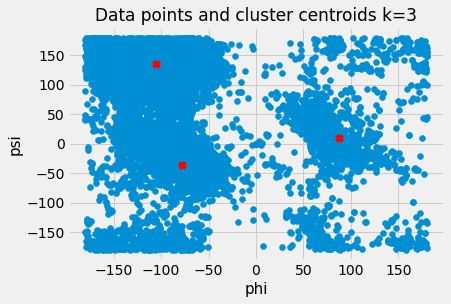

In [5]:
plt.scatter(x, y);
kmeans_chosen = KMeans(n_clusters=3, random_state=0).fit(dataFrame)
plt.scatter(kmeans_chosen.cluster_centers_[:, 0], kmeans_chosen.cluster_centers_[:, 1], c='red', marker='x')
plt.title(label='Data points and cluster centroids k=3', fontsize=17)
plt.xlabel(xlabel='phi',fontsize=15)
plt.ylabel(ylabel='psi',fontsize=15)
plt.show()


### c.

The data has been transformed by adding a full cycle (360) to all angles and then using modulo the make sure all values are in the first cycle (0-360). Essentially we are making all values poistive and the values that already are positive are unchanged. We now have 2 cores instead and we would suggest that this is a simpler way to represent the same result, since It's easier to read values on the range (0 - 360) instead of (-180 - 180).

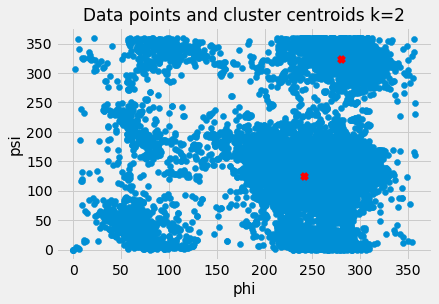

In [6]:
dataFrame_new = dataFrame.transform(func = lambda val : ((val + 360)%360))
plt.scatter(dataFrame_new['phi'], dataFrame_new['psi']);
kmeans_chosen_new = KMeans(n_clusters=2, random_state=0).fit(dataFrame_new)
plt.scatter(kmeans_chosen_new.cluster_centers_[:, 0], kmeans_chosen_new.cluster_centers_[:, 1], c='red', marker='x')
plt.title(label='Data points and cluster centroids k=2', fontsize=17)
plt.xlabel(xlabel='phi',fontsize=15)
plt.ylabel(ylabel='psi',fontsize=15)
plt.show()

k = [1,2,3,4,5,6,7,9]

sse = []
for i in k :
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dataFrame_new)
    sse.append(kmeans.inertia_)

## 3.

### a.  

Estimated number of noise points: 1286
Estimated percentage of noise points: 4.378766726820797


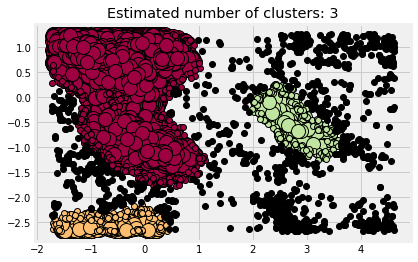

In [7]:
X = np.column_stack((x,y))
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=75).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of noise points: ' + str(n_noise_))
print('Estimated percentage of noise points: ' + str((n_noise_/(len(X))) * 100))

%matplotlib inline

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: ' + str(n_clusters_))
plt.show()

### i.  
  
When choosing the minimum number of samples in the neighborhood for a point to be considered as a core point we ended up with the value of 75. We did some testing to figure out what was reasonable. We did not want too little since there are so many points in this data, almost 30 000. If we have it smaller it quickly becomes a lot of clusters since the data is so spread. This creates noise instead of including the points in a cluster, but since our total amount of noise is about 4% of the total data we think it's reasonable.

### ii.  
  
Very similar reasoning to the number of neighbors. We can't have too large epsilon since the data is so spread, increasing the epsilon just a little bit creates a lot of clusters in random spots that just barely reach the requirement, 0.2 seems to be the ideal value if you don't want loads of random small clusters everywhere between the clusters we now have. The total amount of noise now is 1286 points.

### b.  
In K-means two of the three cores are chosen inside the top left cluster. In DBSCAN it made the whole top left one big cluster instead, while it created the third cluster in the bottom left, which seems to be excluded entirely in K-means when just using three cores. They do have the same amount of cores though.

### c.  
DBSCAN is very fragile when it comes to these variables, just small changes can quickly create a lot more clusters, especially in this dataset since we have so much data, almost 30 000 points. It took some testing to end up with this result and it also seems like there has to be a really good balance between the two, so both variables are quite fragile. However, as mentioned, It's extremely fragile in this example because of the amount of data and the fact that it's spread everywhere. If there was data with less noise and less spread out it would not be that fragile, there is always noise though so that perfect scenario won't really happen.

## 4.

### a.  
The results here differ for sure, we have to adjust minimum samples when using this data since there is so much less data, around 1600 points. The epsilon value however seems to still work out great since the values with type PRO are quite close to each other and not too far spread out. What we see in this result is that only the top left cluster remains, this time even the DBSCAN wants to split that cluster into two. This is because the entries that would connect these two clusters now is not as dense, not creating a supporting "Bridge" between the clusters that would make them one. We could change the minimum samples values to change this if we would like, but it is quite spread in the gap so we would have to take a low value enough to create a lot of random clusters that barely meet the requirement of being a cluster, so we think this is the optimal values. We also remain at the same amount of noise in percentage, around 5% noise.

In [ ]:
X = []

for index, row in df.iterrows():
    if row['residue name'] == "PRO":
        X.append((row['phi'], row['psi']))
        
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of noise points: ' + str(n_noise_))
print('Estimated percentage of noise points: ' + str((n_noise_/(len(X))) * 100))

%matplotlib inline

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: ' + str(n_clusters_))
plt.show()

### b.  
The GLY residue seems to be way more spread out. There are not a lot more points of GLY than PRO (2000 vs 1500) but it creates a lot more clusters. Here we adjusted the minimum samples again to fit the current data. Since It's the same type of data, quite dense, we don't have to change the epsilon here either, we just change the minimum amount of neighbors to adjust to the new amount of data we have. Since it's more data than the PRO set we make the value higher. What seems to work great for this set is the value 25, at this point, we remain at the same level of noise that we have in all previous sets too, around 4%. It did create 6 clusters, where the bottom right also almost split. It is a lot more clusters than previous sets but that is because the data is way more spread. It has quite nice looking clusters, however, still a great result even though it's way more clusters than previous sets.

In [ ]:
X = []

for index, row in df.iterrows():
    if row['residue name'] == "GLY":
        X.append((row['phi'], row['psi']))
        
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=25).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of noise points: ' + str(n_noise_))
print('Estimated percentage of noise points: ' + str((n_noise_/(len(X))) * 100))

%matplotlib inline

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: ' + str(n_clusters_))
plt.show()